# Part 1 - Loading Data
---
### Papers Past Topic Modeling
<br/>

Ben Faulks - bmf43@uclive.ac.nz

Xiandong Cai - xca24@uclive.ac.nz

Yujie Cui - ycu23@uclive.ac.nz

In [1]:
import glob, os, sys, subprocess
sys.path.insert(0, '../utils') # for import customed modules
from utils import print_info, print_filesize, load_dataset
from pprint import pprint
import pandas as pd
pd.set_option('display.max_columns', 500)

# for plot
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# for PySpark
import findspark
import pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import functions as F
from pyspark.sql.types import *
from pyspark.sql.session import SparkSession

## 1 The Papers Past Dataset

In [2]:
# set path of raw data
path = r'../data/papers_past'

**Check total dataset directory size:**

In [3]:
print('Total size:', subprocess.check_output(['du','-sh', path]).split()[0].decode('utf-8'))

Total size: 33G


**Check dataset files path and size:**

In [4]:
files = glob.glob(path + '/*.txt')
files.sort()
print_filesize(files)

1 ../data/papers_past/Akaroa Mail and Banks Peninsula Advertiser.txt 198.2 MB
2 ../data/papers_past/Albertland Gazette.txt 266.6 KB
3 ../data/papers_past/Ashburton Guardian.txt 882.2 MB
4 ../data/papers_past/Auckland Star.txt 1.2 GB
5 ../data/papers_past/Bay Of Plenty Times.txt 403.4 MB
6 ../data/papers_past/Bruce Herald.txt 300.1 MB
7 ../data/papers_past/Bush Advocate.txt 178.4 MB
8 ../data/papers_past/Clutha Leader.txt 245.5 MB
9 ../data/papers_past/Colonist.txt 970.4 MB
10 ../data/papers_past/Daily Southern Cross.txt 796.9 MB
11 ../data/papers_past/Daily Telegraph.txt 456.1 MB
12 ../data/papers_past/Ellesmere Guardian.txt 342.0 MB
13 ../data/papers_past/Evening Post.txt 5.9 GB
14 ../data/papers_past/Fair Play.txt 3.0 MB
15 ../data/papers_past/Feilding Star.txt 823.5 MB
16 ../data/papers_past/Grey River Argus.txt 946.6 MB
17 ../data/papers_past/Hawera & Normanby Star.txt 1.3 GB
18 ../data/papers_past/Hawke's Bay Herald.txt 424.6 MB
19 ../data/papers_past/Hawke's Bay Weekly Times.txt 

**Check total samples/rows/documents of the dataset:**

In [5]:
# list of each file line number
lines = [sum(1 for line in open(f)) for f in files] 

print('Total sample number:', sum(lines))

Total sample number: 16731578


**Visualize the dataset based on the file/publisher:**

In [6]:
# list of each file name
names = [os.path.splitext(os.path.basename(f))[0] for f in files] 
# dictionary of each file path and line number
info = dict(zip(names, lines)) 

# transform dict of dataset files to dataframe for statistic and ploting.
df_info = pd.DataFrame.from_dict(info, orient='index').reset_index()
df_info.columns = ['publisher', 'lines']
df_info = df_info.sort_values('lines', ascending=False).reset_index(drop=True)
df_info.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
publisher,Evening Post,Hawera & Normanby Star,Wanganui Chronicle,Otago Daily Times,Marlborough Express,Auckland Star,Poverty Bay Herald,Colonist,Ashburton Guardian,Grey River Argus,Thames Star,Feilding Star,Star,Wanganui Herald,Wairarapa Daily Times,Nelson Evening Mail,Otago Witness,Taranaki Herald,West Coast Times,Northern Advocate,North Otago Times,Bay Of Plenty Times,Daily Telegraph,Hawke's Bay Herald,Daily Southern Cross,Southland Times,Timaru Herald,Ellesmere Guardian,NZ Truth,Ohinemuri Gazette,Bruce Herald,Tuapeka Times,Observer,Bush Advocate,Mataura Ensign,Akaroa Mail and Banks Peninsula Advertiser,Clutha Leader,New Zealand Tablet,Manawatu Standard,Wellington Independent,"Rodney and Otamatea Times, Waitemata and Kaipa...",Inangahua Times,Waikato Times,Manawatu Herald,Taranaki Daily News,Nelson Examiner and New Zealand Chronicle,Manawatu Times,Otautau Standard and Wallace County Chronicle,Lyttelton_Times,Te Aroha News,Hutt News,Kaipara and Waitemata Echo,New Zealand Spectator and Cook's Strait Guardian,New Zealand Free Lance,Waiapu Church Gazette,Oxford Observer,New Zealander,New Zealand Gazette and Wellington Spectator,Waimate Daily Advertiser,New Zealand Illustrated Magazine,Progress,Hawke's Bay Weekly Times,New Zealand Colonist and Port Nicholson Advert...,Kai Tiaki,Fair Play,Waiapu Church Times,New Zealand Advertiser and Bay of Islands Gazette,Albertland Gazette
lines,3007465,807068,804226,747706,711069,674134,643505,638055,603346,574017,562647,467377,431855,420421,375253,343312,329016,328784,314293,290601,283063,246233,217769,216671,215102,211876,205144,182751,135108,133499,120432,116973,116157,101273,98941,96608,88108,79804,79269,76112,75831,70689,61250,59989,59712,51238,43499,40199,28911,26683,16138,15809,14283,14232,13733,9908,9886,5400,5037,4201,3216,1690,1650,1630,1180,245,184,112


Text(0.5, 0, 'File/Publisher')

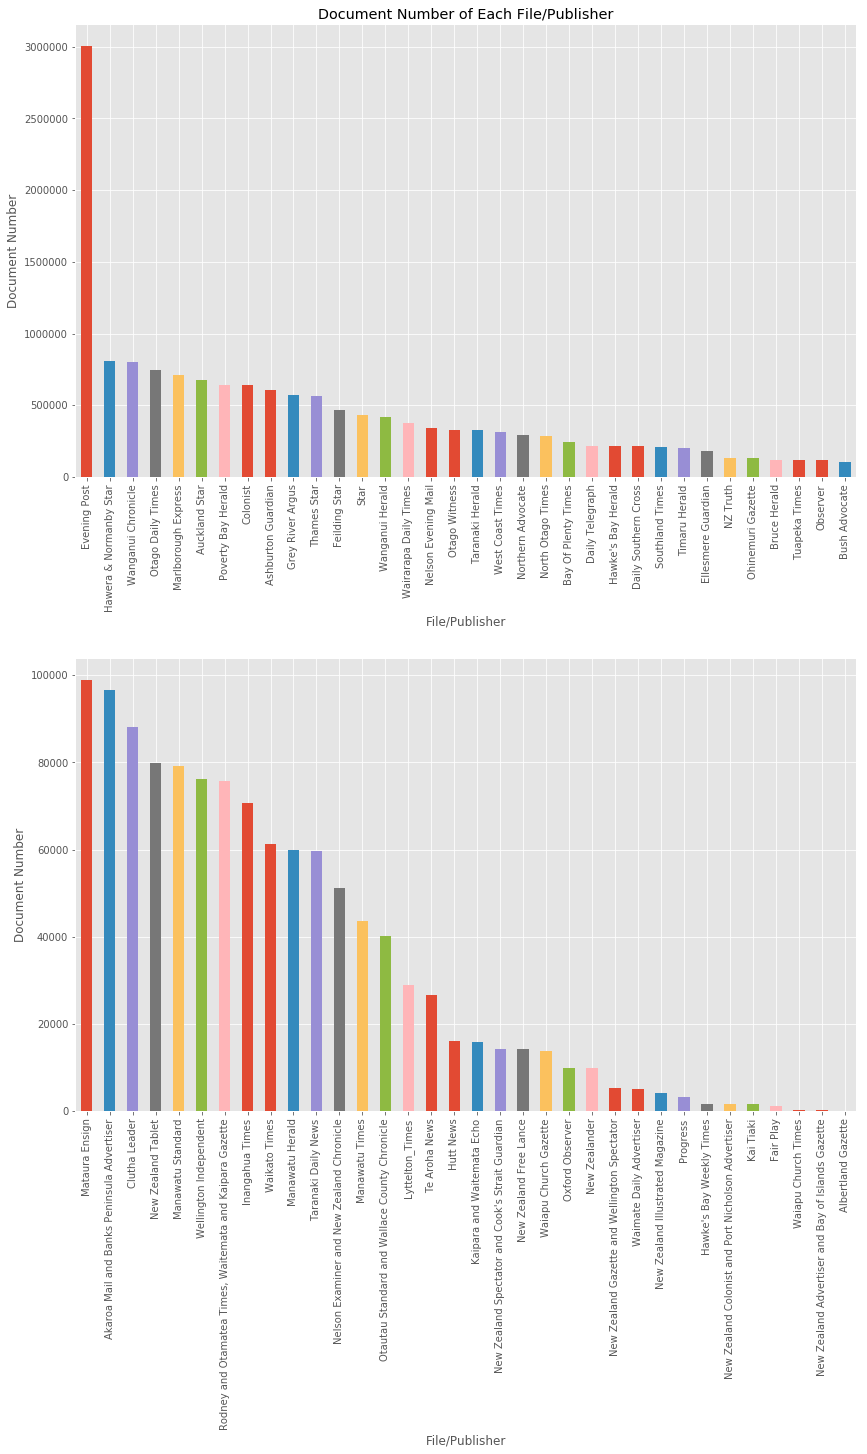

In [7]:
# index of half dataframe, split dataframe to plot better
i = int(df_info.shape[0]/2)

# plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 20))
fig.subplots_adjust(hspace=0.4)
df_info.iloc[:i].plot(ax=axes[0], 
                      kind='bar', 
                      x='publisher', 
                      y='lines', 
                      legend=False)
df_info.iloc[i:].plot(ax=axes[1], 
                      kind='bar', 
                      x='publisher', 
                      y='lines', 
                      legend=False)
axes[0].set_title('Document Number of Each File/Publisher')
axes[0].set_ylabel('Document Number')
axes[0].set_xlabel('File/Publisher')
axes[1].set_ylabel('Document Number')
axes[1].set_xlabel('File/Publisher')

**The Papers Past dataset has:**
* total 33 GB,
* total 68 files, 
* total 16,731,578 lines(samples), 
* each file contains lines from 3,007,465 (Evening Post) to 112 (Albertland Gazette).

## 2 Loading Dataset With PySpark

**For 33 GB dataset, we chose using PySpark as our data process plateform.**

In [8]:
findspark.init()
# start a Spark context and session
conf = SparkConf()
conf.setAppName('local')
conf.set('spark.driver.cores', 6) # set processor number
conf.set('spark.driver.memory', '62g') # set memory size
conf.set('spark.driver.maxResultSize', '4g')

try:
    sc.stop()
    sc = SparkContext(conf=conf)
except:
    sc = SparkContext(conf=conf)

# passing spark context ot sql module
spark = SparkSession(sc)

# print configurations
pprint(spark.sparkContext._conf.getAll())

# check context
sc

[('spark.app.name', 'local'),
 ('spark.driver.port', '40767'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.driver.host', '192.168.1.207'),
 ('spark.driver.memory', '62g'),
 ('spark.master', 'local[*]'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.driver.cores', '6'),
 ('spark.driver.maxResultSize', '4g'),
 ('spark.app.id', 'local-1548110402402')]


<SparkContext master=local[*] appName=local>

**Load dataset:**

In [9]:
df = load_dataset('papers_past', spark)

**Print random rows of the loaded dataframe, and check row number of the loaded dataframe:**

In [10]:
print('Shape of dataframe: ({}, {})'.format(df.count(), len(df.columns)))
df.sample(False, 0.00001).limit(20).toPandas().head(20)

Shape of dataframe: (16731578, 6)


,id,url,publisher,time,title,content
0,10055290,http://api.digitalnz.org/records/10055290/source,Poverty Bay Herald,1898-01-28T00:00:00.000Z,Page 2 Advertisements Column 1 (Poverty Bay He...,GENTLEMEN'S EMPORIUM. R. ROBERTSON (Late of Ro...
1,16459230,http://api.digitalnz.org/records/16459230/source,Poverty Bay Herald,1916-10-04T00:00:00.000Z,Page 10 Advertisements Column 1 (Poverty Bay H...,TO-MORROW At 2 p.ni. ATTRACTIVE SALE OP HICH-C...
2,16727954,http://api.digitalnz.org/records/16727954/source,Poverty Bay Herald,1918-12-16T00:00:00.000Z,"WHAT CHINA WANTS. (Poverty Bay Herald, 16 Dece...",WHAT CHINA WANTS.(Australian and N.Z. Cable As...
3,7635261,http://api.digitalnz.org/records/7635261/source,Poverty Bay Herald,1890-01-10T00:00:00.000Z,Page 3 Advertisements Column 1 (Poverty Bay He...,"FOR SALE,A A A RA M LAM Bs • for f reezin 8- 1..."
4,8066408,http://api.digitalnz.org/records/8066408/source,Poverty Bay Herald,1891-08-20T00:00:00.000Z,"Port of Poverty Bay. (Poverty Bay Herald, 20 A...",Port of Poverty Bay.SIGH WATER.-STJN RISES AND...
5,11429697,http://api.digitalnz.org/records/11429697/source,Poverty Bay Herald,1902-10-17T00:00:00.000Z,"TIDES GISBORNE WHARF. (Poverty Bay Herald, 17 ...","b""TIDES GISBORNE WHARF.;ober I A.M. P.M. I Moo..."
6,3495362,http://api.digitalnz.org/records/3495362/source,Manawatu Standard,1885-08-05T00:00:00.000Z,Page 2 Advertisements Column 5 (Manawatu Stand...,NOTICE TO ADVERTISERS. A DVERTISEMENTS for TUB...
7,27455377,http://api.digitalnz.org/records/27455377/source,Manawatu Standard,1902-10-14T00:00:00.000Z,"Untitled (Manawatu Standard, 14 October 1902)",b'The rfduecd r.nl\'.v.iy r.itc^ for distances...
8,6493786,http://api.digitalnz.org/records/6493786/source,Tuapeka Times,1890-05-03T00:00:00.000Z,"BRITISH AND FOREIGN NEWS. (Tuapeka Times, 03 M...","BRITISH AND FOREIGN NEWS.Condin, an Italian sp..."
9,5540517,http://api.digitalnz.org/records/5540517/source,Ohinemuri Gazette,1909-05-03T00:00:00.000Z,"FIRTH'S LABORATORY, AUCKLAND. (Ohinemuri Gazet...","FIRTH'S LABORATORY, AUCKLAND.A visit to the la..."


---

*print system information and package version:*

In [11]:
print_info()

***System Info***
 {'commit_hash': '59a7834d2',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/usr/local/lib/python3.5/dist-packages/IPython',
 'ipython_version': '7.1.1',
 'os_name': 'posix',
 'platform': 'Linux-4.4.0-141-generic-x86_64-with-Ubuntu-16.04-xenial',
 'sys_executable': '/usr/bin/python3',
 'sys_platform': 'linux',
 'sys_version': '3.5.2 (default, Nov 12 2018, 13:43:14) \n[GCC 5.4.0 20160609]'}

***Package Info***
pyspark==2.4.0
findspark==1.3.0
